## Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("amazon_products_data.csv")

In [3]:
df.head()

,rl,asin,name,overview,price,currency,availability,brand,about_item,img_source,description,specifications,primary_category,category_1,category_2,category_3,breadcrumbs
0,https://www.amazon.in/dp/1788832566,1788832566,Hands-On Design Patterns with C++: Solve commo...,[],"1,600.00",INR,NaN,by \n Fedor G. Pikus (Au...,NaN,https://images-na.ssl-images-amazon.com/images...,NaN,[],Books,Computers & Internet,Programming & Software Development,NaN,Books | Computers & Internet | Programming & S...
1,https://www.amazon.in/dp/0766199592,0766199592,The Blazing Horizon The True Story of Pawnee B...,[],"2,399.00",INR,Usually dispatched in 13 to 14 days.,by \nErnest Lynn \n(Author),NaN,https://images-na.ssl-images-amazon.com/images...,NaN,[],Books,Action & Adventure,NaN,NaN,Books | Action & Adventure
2,https://www.amazon.in/dp/B071ZCD9XH,B071ZCD9XH,Fast and easy lunch box: A collection of 15eas...,[],NaN,NaN,NaN,by \nNinety Nine Cents Pres...,NaN,https://m.media-amazon.com/images/I/41g9Z21QuG...,NaN,[],Kindle Store,Kindle eBooks,"Crafts, Home & Lifestyle",NaN,"Kindle Store | Kindle eBooks | Crafts, Home & ..."
3,https://www.amazon.in/dp/B00IG6EML8,B00IG6EML8,European Foreign Policy Scorecard 2014,[],NaN,NaN,NaN,"by \nMark Leonard \n(Editor), \n\...",NaN,https://m.media-amazon.com/images/I/41MsQ8IKFK...,NaN,[],Kindle Store,Kindle eBooks,Politics,NaN,Kindle Store | Kindle eBooks | Politics
4,https://www.amazon.in/dp/1637583060,1637583060,The 13th Hour: Chaos (Volume 2) (The Nick Quin...,[],"1,849.00",INR,Usually dispatched in 13 to 14 days.,by \n Richard Doetsch (A...,NaN,https://images-na.ssl-images-amazon.com/images...,NaN,[],Books,"Crime, Thriller & Mystery",Thrillers and Suspense,NaN,"Books | Crime, Thriller & Mystery | Thrillers ..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rl                1436 non-null   object
 1   asin              1436 non-null   object
 2   name              1435 non-null   object
 3   overview          1436 non-null   object
 4   price             1092 non-null   object
 5   currency          1092 non-null   object
 6   availability      959 non-null    object
 7   brand             1426 non-null   object
 8   about_item        119 non-null    object
 9   img_source        1436 non-null   object
 10  description       108 non-null    object
 11  specifications    1407 non-null   object
 12  primary_category  1436 non-null   object
 13  category_1        1436 non-null   object
 14  category_2        1218 non-null   object
 15  category_3        96 non-null     object
 16  breadcrumbs       1436 non-null   object
dtypes: object(17)


In [5]:
len(df)

1436

In [6]:
df.shape

(1436, 17)

In [7]:
df.isnull().sum()

rl                     0
asin                   0
name                   1
overview               0
price                344
currency             344
availability         477
brand                 10
about_item          1317
img_source             0
description         1328
specifications        29
primary_category       0
category_1             0
category_2           218
category_3          1340
breadcrumbs            0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Exploratory Data Analysis

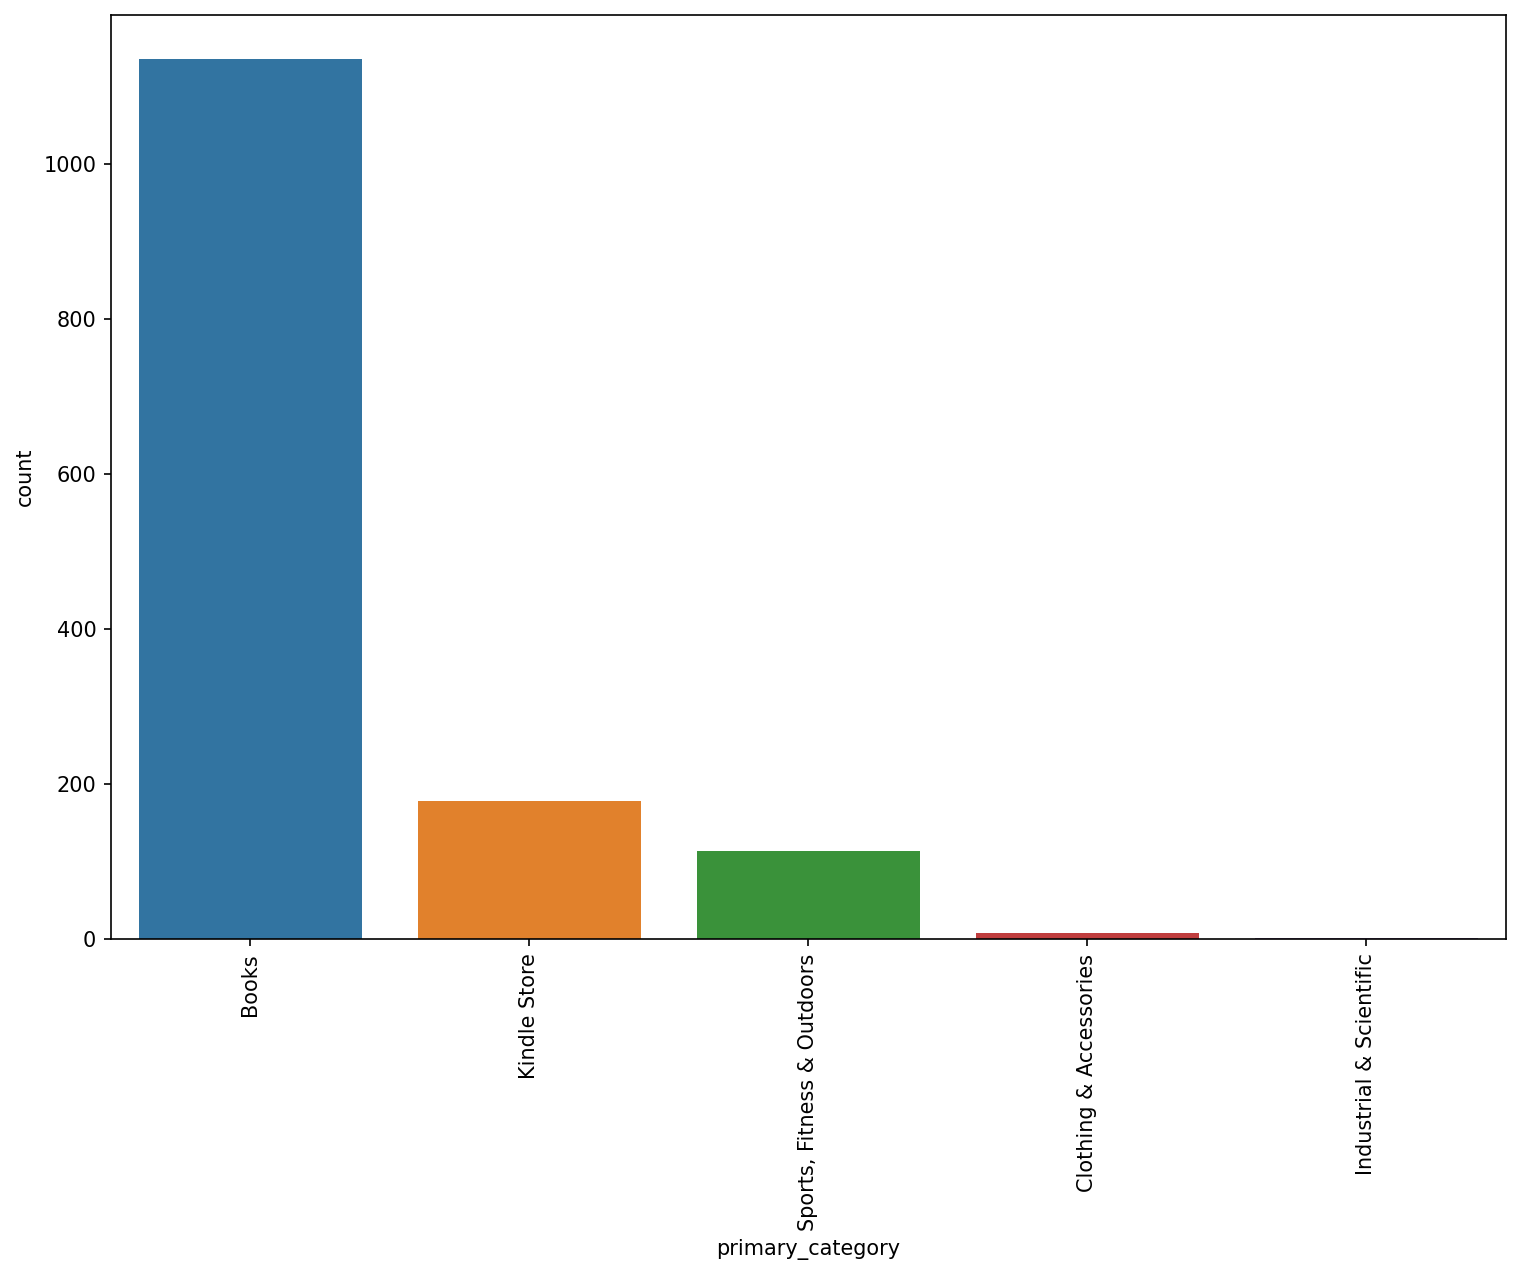

In [9]:
plt.figure(figsize=(12,8),dpi=150)
sns.countplot(data=df,x='primary_category')
plt.xticks(rotation=90);

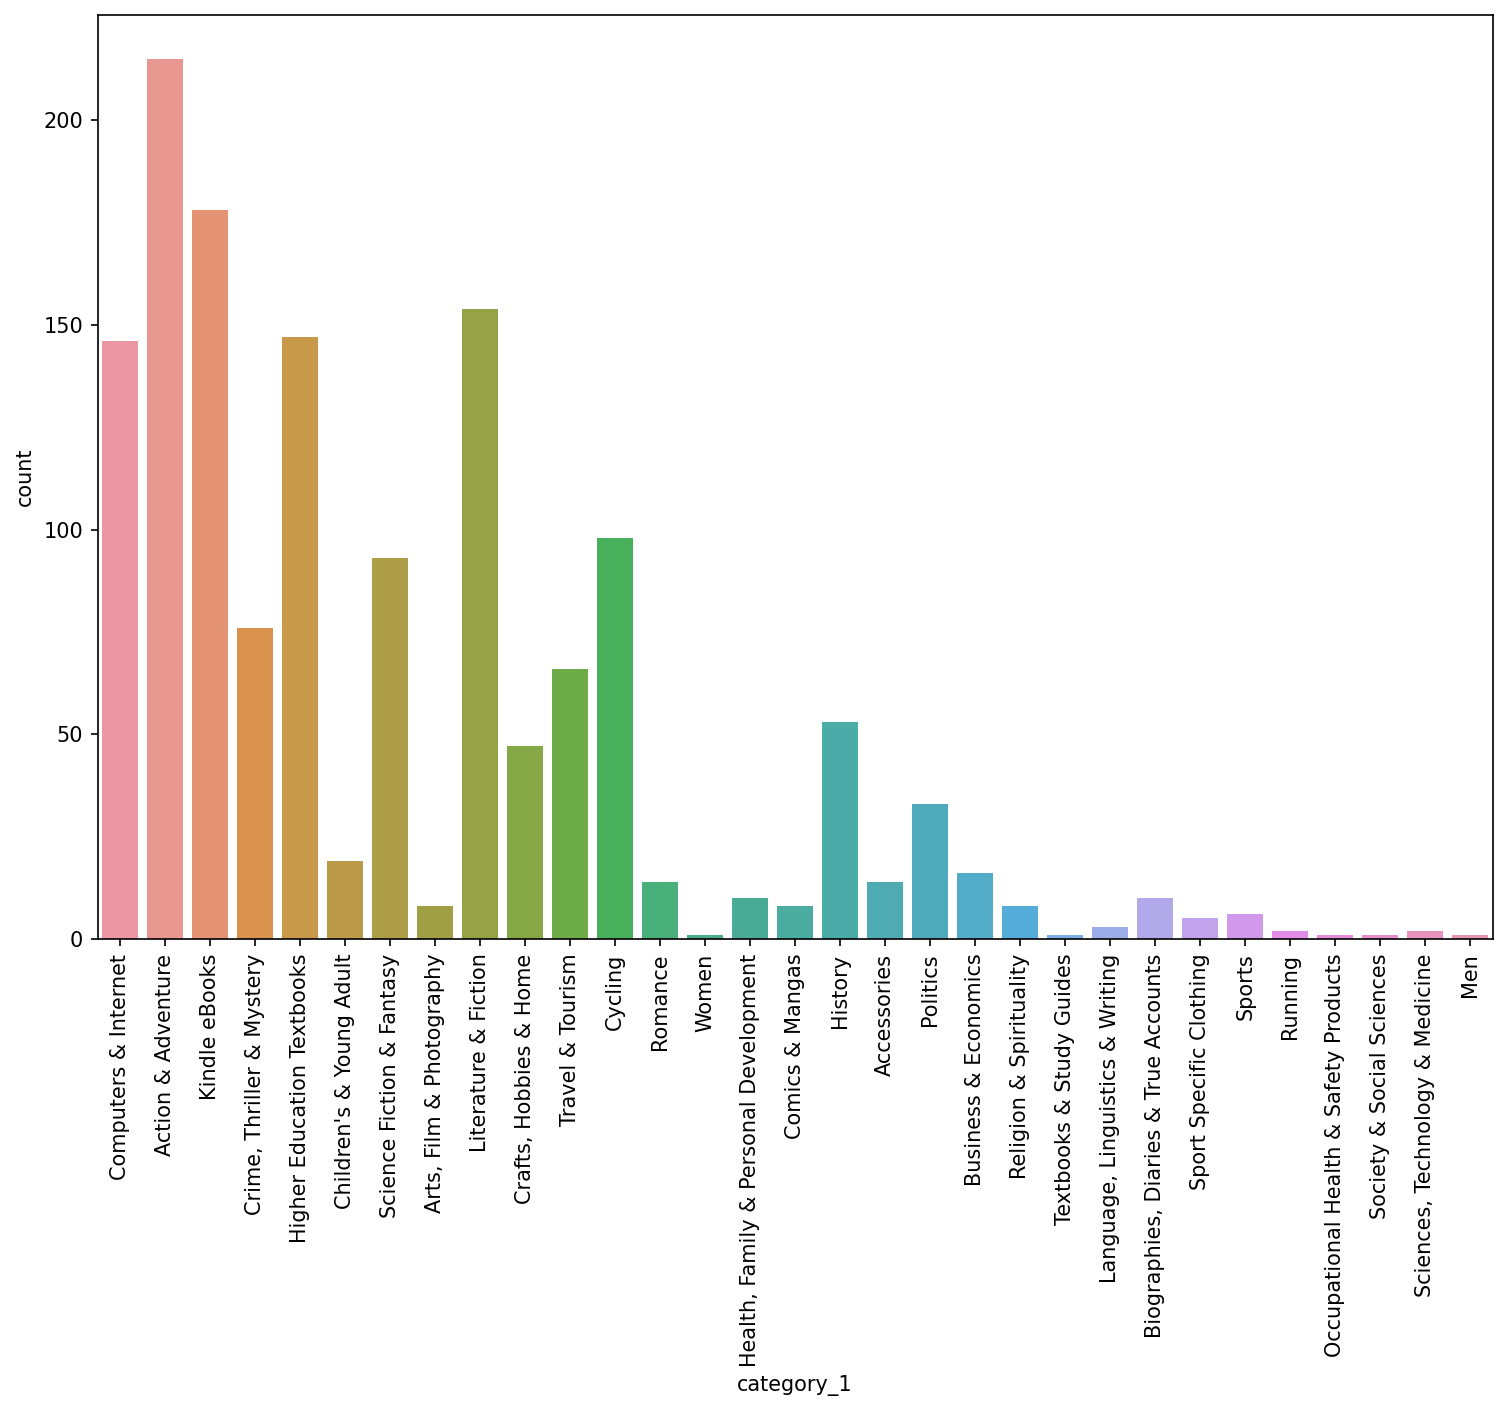

In [10]:
plt.figure(figsize=(12,8),dpi=150)
sns.countplot(data=df,x='category_1')
plt.xticks(rotation=90);

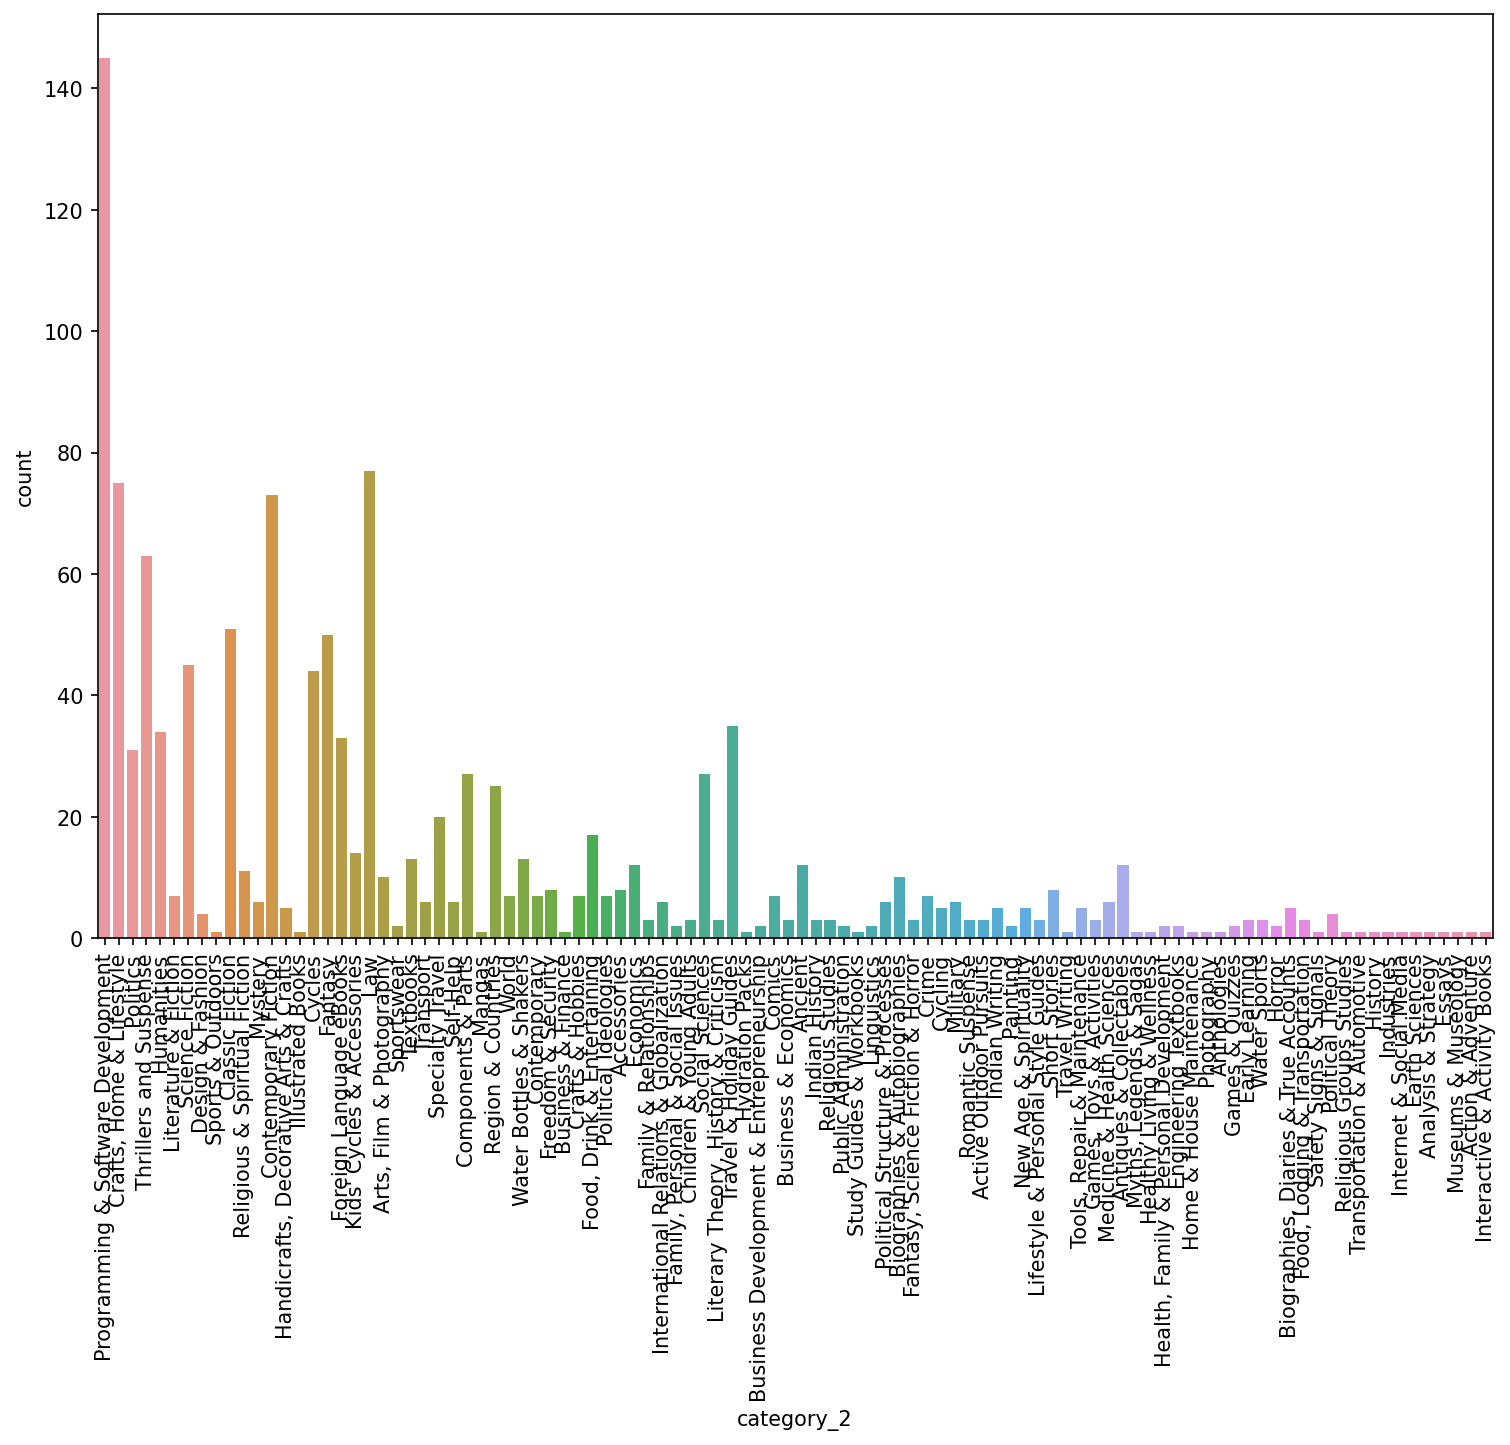

In [11]:
plt.figure(figsize=(12,8),dpi=150)
sns.countplot(data=df,x='category_2')
plt.xticks(rotation=90);

##  Content Based Recommender System


In easy words, we can say that this filtering is based on the description of an item and a profile of the user’s choices. This filtering system tries to establish a relation between the user and item, besides, a user profile is built to state the type of item this user likes. A user likes the product, then the recommendation is based on the description of the product, which means this type of feature that the user wants in the respective product. This approach has its roots in information retrieval and information filtering.

It is simply Item-User based filtering system, let’s see the mathematical structure of content-based filtering…



Recommendation Engines
 

Example:

Let’s take an example for easy understanding, take movie I which is an action, drama, and sci-fi type movie this is watched by a user, there is another movie with the type of action, crime and sci-fi type this movie is recommended to the user to watch because the content is so similar of both the movie.

Why Content-Based Filtering is not used on a Large Scale?
A major problem or issue with content-based filtering is the system learns from the user’s actions or preferences from one content and reflects all other content that the user uses. Suppose a user already using the same content in 5 of 10 products, so there is no change in the other 5 content because the system or engine does not have valuable information which can recommend new content to the user. The value from the recommendation system is significantly less when any other content types from any other services can be recommended. There is no other new variety of content for the user to recommend.

An easy example of this is supposed, a song that is romantic and sad this type of content is similarly applicable for all other songs you listen to if you want to listen to chill songs, but this system can be able to recommend you this.

How to identify the problem is specific to content-based recommendations?

Content-based engines are completed in the following cases or phases…

1. There is a single user is present in the data. User(i), the consumer of the content.

2. There is a list of items or contents in the dataset, like music, videos, articles, blogs, etc…

3. A user-perceived value of an item is present, such as ratings, behaviour, etc…

4. The component definitions and the algorithms used for the recommendation.



In [12]:
df['name'].isnull().sum()

1

In [13]:
df[df['name'].isnull()]

,rl,asin,name,overview,price,currency,availability,brand,about_item,img_source,description,specifications,primary_category,category_1,category_2,category_3,breadcrumbs
1093,https://www.amazon.in/dp/1603848487,1603848487,NaN,[],"1,468.75",INR,Only 2 left in stock.,by \nPatrick Olivelle \n(Translato...,NaN,https://images-na.ssl-images-amazon.com/images...,NaN,[],Books,History,Region & Countries,NaN,Books | History | Region & Countries


In [14]:
df = df.drop(labels=[1093],axis=0)

In [15]:
len(df)

1435

In [16]:
df.head()

,rl,asin,name,overview,price,currency,availability,brand,about_item,img_source,description,specifications,primary_category,category_1,category_2,category_3,breadcrumbs
0,https://www.amazon.in/dp/1788832566,1788832566,Hands-On Design Patterns with C++: Solve commo...,[],"1,600.00",INR,NaN,by \n Fedor G. Pikus (Au...,NaN,https://images-na.ssl-images-amazon.com/images...,NaN,[],Books,Computers & Internet,Programming & Software Development,NaN,Books | Computers & Internet | Programming & S...
1,https://www.amazon.in/dp/0766199592,0766199592,The Blazing Horizon The True Story of Pawnee B...,[],"2,399.00",INR,Usually dispatched in 13 to 14 days.,by \nErnest Lynn \n(Author),NaN,https://images-na.ssl-images-amazon.com/images...,NaN,[],Books,Action & Adventure,NaN,NaN,Books | Action & Adventure
2,https://www.amazon.in/dp/B071ZCD9XH,B071ZCD9XH,Fast and easy lunch box: A collection of 15eas...,[],NaN,NaN,NaN,by \nNinety Nine Cents Pres...,NaN,https://m.media-amazon.com/images/I/41g9Z21QuG...,NaN,[],Kindle Store,Kindle eBooks,"Crafts, Home & Lifestyle",NaN,"Kindle Store | Kindle eBooks | Crafts, Home & ..."
3,https://www.amazon.in/dp/B00IG6EML8,B00IG6EML8,European Foreign Policy Scorecard 2014,[],NaN,NaN,NaN,"by \nMark Leonard \n(Editor), \n\...",NaN,https://m.media-amazon.com/images/I/41MsQ8IKFK...,NaN,[],Kindle Store,Kindle eBooks,Politics,NaN,Kindle Store | Kindle eBooks | Politics
4,https://www.amazon.in/dp/1637583060,1637583060,The 13th Hour: Chaos (Volume 2) (The Nick Quin...,[],"1,849.00",INR,Usually dispatched in 13 to 14 days.,by \n Richard Doetsch (A...,NaN,https://images-na.ssl-images-amazon.com/images...,NaN,[],Books,"Crime, Thriller & Mystery",Thrillers and Suspense,NaN,"Books | Crime, Thriller & Mystery | Thrillers ..."


In [17]:
new_df =df[['rl','name','img_source','breadcrumbs']]

In [18]:
new_df

,rl,name,img_source,breadcrumbs
0,https://www.amazon.in/dp/1788832566,Hands-On Design Patterns with C++: Solve commo...,https://images-na.ssl-images-amazon.com/images...,Books | Computers & Internet | Programming & S...
1,https://www.amazon.in/dp/0766199592,The Blazing Horizon The True Story of Pawnee B...,https://images-na.ssl-images-amazon.com/images...,Books | Action & Adventure
2,https://www.amazon.in/dp/B071ZCD9XH,Fast and easy lunch box: A collection of 15eas...,https://m.media-amazon.com/images/I/41g9Z21QuG...,"Kindle Store | Kindle eBooks | Crafts, Home & ..."
3,https://www.amazon.in/dp/B00IG6EML8,European Foreign Policy Scorecard 2014,https://m.media-amazon.com/images/I/41MsQ8IKFK...,Kindle Store | Kindle eBooks | Politics
4,https://www.amazon.in/dp/1637583060,The 13th Hour: Chaos (Volume 2) (The Nick Quin...,https://images-na.ssl-images-amazon.com/images...,"Books | Crime, Thriller & Mystery | Thrillers ..."
...,...,...,...,...
1431,https://www.amazon.in/dp/1093595124,Pale Horse: 6 (Forever Free),https://images-na.ssl-images-amazon.com/images...,Books | Action & Adventure
1432,https://www.amazon.in/dp/B098MJJLD9,arythe Ultralight Comfortable Breathable Bicyc...,https://m.media-amazon.com/images/I/410qM7JEi8...,"Sports, Fitness & Outdoors | Cycling | Accesso..."
1433,https://www.amazon.in/dp/1720297185,Elixir de Muerte: 1,https://images-na.ssl-images-amazon.com/images...,Books | Action & Adventure
1434,https://www.amazon.in/dp/0393091538,Henry Kissinger – The Anguish of Power,https://images-na.ssl-images-amazon.com/images...,Books | Higher Education Textbooks | Social Sc...


In [19]:
new_df =new_df.rename(columns={'breadcrumbs':'tags'})

In [20]:
new_df['tags']=new_df['tags'].apply(lambda x:x.split('|'))

In [21]:
new_df

,rl,name,img_source,tags
0,https://www.amazon.in/dp/1788832566,Hands-On Design Patterns with C++: Solve commo...,https://images-na.ssl-images-amazon.com/images...,"[Books , Computers & Internet , Programming ..."
1,https://www.amazon.in/dp/0766199592,The Blazing Horizon The True Story of Pawnee B...,https://images-na.ssl-images-amazon.com/images...,"[Books , Action & Adventure]"
2,https://www.amazon.in/dp/B071ZCD9XH,Fast and easy lunch box: A collection of 15eas...,https://m.media-amazon.com/images/I/41g9Z21QuG...,"[Kindle Store , Kindle eBooks , Crafts, Home..."
3,https://www.amazon.in/dp/B00IG6EML8,European Foreign Policy Scorecard 2014,https://m.media-amazon.com/images/I/41MsQ8IKFK...,"[Kindle Store , Kindle eBooks , Politics]"
4,https://www.amazon.in/dp/1637583060,The 13th Hour: Chaos (Volume 2) (The Nick Quin...,https://images-na.ssl-images-amazon.com/images...,"[Books , Crime, Thriller & Mystery , Thrille..."
...,...,...,...,...
1431,https://www.amazon.in/dp/1093595124,Pale Horse: 6 (Forever Free),https://images-na.ssl-images-amazon.com/images...,"[Books , Action & Adventure]"
1432,https://www.amazon.in/dp/B098MJJLD9,arythe Ultralight Comfortable Breathable Bicyc...,https://m.media-amazon.com/images/I/410qM7JEi8...,"[Sports, Fitness & Outdoors , Cycling , Acce..."
1433,https://www.amazon.in/dp/1720297185,Elixir de Muerte: 1,https://images-na.ssl-images-amazon.com/images...,"[Books , Action & Adventure]"
1434,https://www.amazon.in/dp/0393091538,Henry Kissinger – The Anguish of Power,https://images-na.ssl-images-amazon.com/images...,"[Books , Higher Education Textbooks , Social..."


In [22]:
new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))

In [23]:
new_df.head()

,rl,name,img_source,tags
0,https://www.amazon.in/dp/1788832566,Hands-On Design Patterns with C++: Solve commo...,https://images-na.ssl-images-amazon.com/images...,Books Computers & Internet Programming & S...
1,https://www.amazon.in/dp/0766199592,The Blazing Horizon The True Story of Pawnee B...,https://images-na.ssl-images-amazon.com/images...,Books Action & Adventure
2,https://www.amazon.in/dp/B071ZCD9XH,Fast and easy lunch box: A collection of 15eas...,https://m.media-amazon.com/images/I/41g9Z21QuG...,"Kindle Store Kindle eBooks Crafts, Home & ..."
3,https://www.amazon.in/dp/B00IG6EML8,European Foreign Policy Scorecard 2014,https://m.media-amazon.com/images/I/41MsQ8IKFK...,Kindle Store Kindle eBooks Politics
4,https://www.amazon.in/dp/1637583060,The 13th Hour: Chaos (Volume 2) (The Nick Quin...,https://images-na.ssl-images-amazon.com/images...,"Books Crime, Thriller & Mystery Thrillers ..."


In [24]:
new_df['tags']= new_df['tags'].apply(lambda x:x.lower())

In [25]:
new_df

,rl,name,img_source,tags
0,https://www.amazon.in/dp/1788832566,Hands-On Design Patterns with C++: Solve commo...,https://images-na.ssl-images-amazon.com/images...,books computers & internet programming & s...
1,https://www.amazon.in/dp/0766199592,The Blazing Horizon The True Story of Pawnee B...,https://images-na.ssl-images-amazon.com/images...,books action & adventure
2,https://www.amazon.in/dp/B071ZCD9XH,Fast and easy lunch box: A collection of 15eas...,https://m.media-amazon.com/images/I/41g9Z21QuG...,"kindle store kindle ebooks crafts, home & ..."
3,https://www.amazon.in/dp/B00IG6EML8,European Foreign Policy Scorecard 2014,https://m.media-amazon.com/images/I/41MsQ8IKFK...,kindle store kindle ebooks politics
4,https://www.amazon.in/dp/1637583060,The 13th Hour: Chaos (Volume 2) (The Nick Quin...,https://images-na.ssl-images-amazon.com/images...,"books crime, thriller & mystery thrillers ..."
...,...,...,...,...
1431,https://www.amazon.in/dp/1093595124,Pale Horse: 6 (Forever Free),https://images-na.ssl-images-amazon.com/images...,books action & adventure
1432,https://www.amazon.in/dp/B098MJJLD9,arythe Ultralight Comfortable Breathable Bicyc...,https://m.media-amazon.com/images/I/410qM7JEi8...,"sports, fitness & outdoors cycling accesso..."
1433,https://www.amazon.in/dp/1720297185,Elixir de Muerte: 1,https://images-na.ssl-images-amazon.com/images...,books action & adventure
1434,https://www.amazon.in/dp/0393091538,Henry Kissinger – The Anguish of Power,https://images-na.ssl-images-amazon.com/images...,books higher education textbooks social sc...


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000,stop_words='english')

In [27]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [28]:
# as we can see that it is saying that is stores in the form of sparse matrix means that
# as we have frequency count and lot of elements have 0 presence and it takes a lot of space to store it
# to sapre matrix is compressed form of it
# to array just convert it into an array

In [29]:
vectors[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
cv.get_feature_names_out()

array(['accessories', 'accounts', 'action', 'active', 'activities',
       'activity', 'administration', 'adult', 'adults', 'adventure',
       'age', 'analysis', 'ancient', 'anthologies', 'antiques', 'arts',
       'athletic', 'autobiographies', 'automotive', 'bicycles', 'bikes',
       'biographies', 'books', 'bottles', 'bottoms', 'boys', 'brackets',
       'brake', 'brakes', 'business', 'cables', 'children', 'classic',
       'clothing', 'collectables', 'comfort', 'comics', 'components',
       'computers', 'contemporary', 'countries', 'covers', 'crafts',
       'crime', 'criticism', 'cycles', 'cycling', 'decorative', 'design',
       'development', 'diaries', 'drink', 'early', 'earth', 'ebooks',
       'economics', 'education', 'electric', 'engineering',
       'entertaining', 'entrepreneurship', 'essays', 'family', 'fantasy',
       'fashion', 'fenders', 'fiction', 'film', 'finance', 'fitness',
       'food', 'foreign', 'freedom', 'games', 'gear', 'globalization',
       'gloves',

In [31]:
vectors.shape

(1435, 215)

In [32]:
# as here we have 1435 vector 
# and it is arranged in the 215 dimension space
# distance between the vector tells the similarites between them
# more closer the vector in 215 dimension more similar they
#distance is inversely proportional to similarity
# the distance between should be calculated using cosine 
#(angle between them for angle =10,they are similar,for 90 they are not similar,for 180 they are opposite
# here we are not using euclidean distance as it take oint to point distance and in 215 dimension it will be not accurate


In [33]:
from sklearn.metrics.pairwise import cosine_similarity
# here we are taking similarity ,cosine_distance is same, in this we will get values ranging from 0 to 1
# similarity 1 means more similar 0 means they are not similar

In [34]:
cosine_similarity(vectors)
#this will calculate distance between each product with the other product
# first take one product calculate similarity or distnce with all other products
# same for all products

array([[1.        , 0.23570226, 0.        , ..., 0.23570226, 0.16666667,
        0.15430335],
       [0.23570226, 1.        , 0.        , ..., 1.        , 0.23570226,
        0.21821789],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.23570226, 1.        , 0.        , ..., 1.        , 0.23570226,
        0.21821789],
       [0.16666667, 0.23570226, 0.        , ..., 0.23570226, 1.        ,
        0.15430335],
       [0.15430335, 0.21821789, 0.        , ..., 0.21821789, 0.15430335,
        1.        ]])

In [35]:
similarity = cosine_similarity(vectors)

In [36]:
similarity

array([[1.        , 0.23570226, 0.        , ..., 0.23570226, 0.16666667,
        0.15430335],
       [0.23570226, 1.        , 0.        , ..., 1.        , 0.23570226,
        0.21821789],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.23570226, 1.        , 0.        , ..., 1.        , 0.23570226,
        0.21821789],
       [0.16666667, 0.23570226, 0.        , ..., 0.23570226, 1.        ,
        0.15430335],
       [0.15430335, 0.21821789, 0.        , ..., 0.21821789, 0.15430335,
        1.        ]])

In [37]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]


# this lets that similarity of product at 0 index with the other
# but we want top five similar items only
# so we sorted them
# when we sorted them their index got changed
# to have their index fix, we have enumerate function ,reverse means deecending other
# key means which to sort menas to sort index or similarity value
#as similarity value is at index 1 and index is at zero we used this fuction

[(15, 1.0000000000000002),
 (19, 1.0000000000000002),
 (31, 1.0000000000000002),
 (36, 1.0000000000000002),
 (40, 1.0000000000000002)]

In [54]:
def recommend(product):
    index = new_df[new_df['name'] == product].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].name)
        

In [55]:
new_df.iloc[0]

rl                          https://www.amazon.in/dp/1788832566
name          Hands-On Design Patterns with C++: Solve commo...
img_source    https://images-na.ssl-images-amazon.com/images...
tags          books   computers & internet   programming & s...
Name: 0, dtype: object

In [56]:
new_df['name'][0]

'Hands-On Design Patterns with C++: Solve common C++ problems with modern design patterns and build robust applications'

In [57]:
recommend('Hands-On Design Patterns with C++: Solve common C++ problems with modern design patterns and build robust applications')

15
19
31
36
40


In [58]:
new_df['name'][1]

'The Blazing Horizon The True Story of Pawnee Bill and the Oklahoma Boomers'

In [59]:
recommend('The Blazing Horizon The True Story of Pawnee Bill and the Oklahoma Boomers')

9
18
29
48
56


In [62]:
def recommend(product):
    index = new_df[new_df['name'] == product].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]][1])
        

In [68]:
recommend('The Blazing Horizon The True Story of Pawnee Bill and the Oklahoma Boomers')

Eyes Wide Open: 2
Beyond the Dragon Temple (Classic Reprint)
Elect to Change
Killer Trip: A bone-chilling journey into the unknown
I Missed My Hugs


In [64]:
 new_df.iloc[0][1]

'Hands-On Design Patterns with C++: Solve common C++ problems with modern design patterns and build robust applications'

In [65]:
import pickle
pickle.dump(new_df,open("new_df.pkl","wb"))

In [66]:
pickle.dump(similarity,open("similarity.pkl","wb"))

### 